## Методы text-similarity ##

https://www.quora.com/What-are-the-most-popular-text-similarity-algorithms

1. doc2vec + cosine measure https://code.google.com/archive/p/word2vec/ 
<br>
    GloVe + cosine https://nlp.stanford.edu/projects/glove/
   <br>
   https://github.com/v1shwa/document-similarity
2. Jaccard similarity 
<br>
    https://en.wikipedia.org/wiki/Jaccard_index
<br>
    https://nickgrattan.wordpress.com/2014/02/18/jaccard-similarity-index-for-measuring-document-similarity/
3. Locality-sensitive hashing  
    https://en.wikipedia.org/wiki/Locality-sensitive_hashing 
<br>
    https://github.com/kayzhu/LSHash
<br>
    http://www.mmds.org/
4. Cosine Similarity and IDF Modified Cosine Similarity https://www.youtube.com/watch?v=C3Jt14Se9Cg&feature=youtu.be
<br>
<br>
* cosine similarity in gensim: https://radimrehurek.com/gensim/similarities/docsim.html
<br>
<br>
https://stackoverflow.com/questions/35758612/most-efficient-way-to-construct-similarity-matrix
<br>
<br>
https://ematosevic.wordpress.com/2016/08/21/clustering-data-with-similarity-matrix-in-python-tutorial/

### Articles data

In [1]:
#import sys
#sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

In [31]:
import pandas as pd
import re
#from nltk.corpus import stopwords
import sklearn
#from sklearn.pipeline import Pipeline

#stopwords_rus = stopwords.words('russian')
from stop_words import get_stop_words
stopwords = get_stop_words('russian')
import numpy as np

In [2]:
from tqdm import tqdm

In [3]:
import networkx as nx

In [13]:
metadata = pd.read_csv('meta_rubrics_final.tsv', encoding = 'utf-8', sep = '\t')

In [11]:
def slurp(path):
    with open(path, 'r', encoding = 'utf-8') as file_object:
        return file_object.read()

In [14]:
texts = []
for path in tqdm(metadata.path):
    path = path.replace('\n','').replace('//','/').replace('?code=','-code=')
    #try:
    #    with open('C:/Users/Анна/YandexDisk/popular_science_texts_store/' + path, encoding = 'utf-8') as f:
    #        texts.append(f.read())
    #except OSError:
    texts.append(slurp('C:/Users/Анна/YandexDisk/popular_science_texts_store/' + path))

  0%|          | 0/30793 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Анна/YandexDisk/popular_science_texts_store/chrdk.ru/articles/sci_10_salt_lakes.txt'

In [7]:
metadata['text'] = texts

In [10]:
metadata.shape

(30793, 13)

In [12]:
articles_df = metadata[metadata.text != '']

In [13]:
articles_df.to_csv('articles_with_meta.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [5]:
articles_df = pd.read_csv('articles_with_meta.tsv', sep = '\t', encoding = 'utf-8')

In [6]:
articles_df.head()

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
0,chrdk.ru/articles/sci_10_salt_lakes.txt,https://chrdk.ru/,https://chrdk.ru/sci/10_salt_lakes,16.08.2017,Десять самых известных соленых озер,NaN,Егор Задереев,География_Экология,Статьи,Науки о земле|Науки о земле,Науки о земле,One,"Возможно, не все об этом знают, но объемы воды..."
1,chrdk.ru/articles/sci_33_fractures.txt,https://chrdk.ru/,https://chrdk.ru/sci/33_fractures,08.08.2017,33 перелома,Скелет мужчины с 33 переломами нашли археологи...,Екатерина Боровикова,Российская наука_Антропология,Статьи,История|Мусор,История,One,Останки мужчины с зажившими переломами нашли п...
2,chrdk.ru/articles/sci_46_chromosomes.txt,https://chrdk.ru/,https://chrdk.ru/sci/46_chromosomes,04.08.2017,46 — норма?,Считаем хромосомы: сколько человеку для счасть...,Полина Лосева,Генетика_Медицина,Статьи,Физиология человека|Физиология человека,Физиология человека,One,"В отличие от зубов, хромосом человеку положено..."
3,chrdk.ru/articles/sci_750gev.txt,https://chrdk.ru/,https://chrdk.ru/sci/750gev,23.08.2016,Несбывшиеся надежды на новую физику,Какие «страшные сценарии» физики хотели забыть...,Екатерина Боровикова,Физика_Интервью_Закрытия,Статьи,Мусор|Мусор|Физика,Физика,One,"В начале августа CERN официально объявил, что ..."
4,chrdk.ru/articles/sci_alien_anatomy.txt,https://chrdk.ru/,https://chrdk.ru/sci/alien_anatomy,22.05.2017,Анатомия каменных пришельцев,Спецпроект «Чердака» и «Красивой науки»,NaN,Геология_Космос,Статьи,Космос|Науки о земле,Космос,Multi,Как выглядят и чем отличаются друг от друга го...


In [7]:
articles_df[articles_df.url == 'nplus1.ru/blog/2015/04/15/just-read-the-instructions']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
19752,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-1...,nplus1.ru,nplus1.ru/blog/2015/04/15/just-read-the-instru...,2015-04-15,Посадка Falcon 9 на платформу,NaN,Николай Воронцов,_Космос_Мезонин_,Блоги,|Космос,Космос,One,Сегодня ночью была третья попытка посадить рак...


In [8]:
articles_df[articles_df.url == 'nplus1.ru/news/2015/04/15/nasa-vehicle']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
8696,nplus1.ru/nplus1_news/nplus1.ru-news-2015-04-1...,nplus1.ru,nplus1.ru/news/2015/04/15/nasa-vehicle,2015-04-15,Автомобиль нового поколения по версии NASA,NaN,Николай Воронцов,_Блоги_Мезонин_,Новости,|Мусор,Мусор,One,NASA продемонстрировало роботизированный автом...


In [10]:
articles_df[articles_df.url == 'polit.ru/article/2014/11/18/ps_tools/']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
29839,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/18/ps_tools/,18 ноября 2014,Условия прогресса: обезьяны и орудия,NaN,Александра Брутер,_биология _обезьяны_этология,Статьи,Биология|Биология|Биология,Биология,One,\r\n \r\n \r\n \r\n \r\nОбезьяны начин...


## Preprocessing

In [5]:
#without lemmatization and stop-words
def simple_clean(texts):
    preprocessed_texts_list = []
    for text in tqdm(texts):
        #del_new_line = re.sub(r'\n', '', text.lower()) 
        extracted_text = re.findall(r'[a-zа-яё]+', text.lower())#разделяем на токены
        extracted_text = ' '.join(extracted_text)
        preprocessed_texts_list.append(extracted_text)
    return preprocessed_texts_list

In [10]:
small = articles_df[articles_df.final_rubrics != 'Мусор'].sample(n=100)

In [11]:
small.head()

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
11929,nplus1.ru/nplus1_news/nplus1.ru-news-2016-04-2...,nplus1.ru,nplus1.ru/news/2016/04/21/aarduino,2016-04-21,Arduino уменьшили до размеров пальчиковой бата...,NaN,Николай Воронцов,_Технологии_Сделай сам_,Новости,Мусор|Технологии,Технологии,One,Географическое распределение носителей AviRTE ...
24443,polit.ru_proscience/proscience_news/news-2013-...,http://polit.ru/rubric/proscience/,polit.ru//news/2013/10/14/ps_airstone/,14 октября 2013,В озере Чебаркуль обнаружен претендент на самы...,NaN,NaN,_метеориты_челябинская область,Новости,Космос|Мусор,Космос,One,\n \n \n \n \nВодолазы обнаружили на д...
8521,nplus1.ru/nplus1_news/nplus1.ru-news-2015-07-3...,nplus1.ru,nplus1.ru/news/2015/07/31/send-it-to-outer-spa...,2015-07-31,Юрий Мильнер заплатит миллион долларов за лучш...,NaN,Николай Воронцов,_Космос_,Новости,Космос,Космос,One,"Фрагмент панорамы южного неба, сделанной около..."
873,chrdk.ru/news/news_justinianic_plague.txt,https://chrdk.ru/,https://chrdk.ru/news/justinianic_plague,01.09.2016,"Биологи восстановили геном чумной палочки, выз...",NaN,NaN,Археология_История_Генетика_Микробиология_Антр...,Новости,Биология|История|История|История|Физиология че...,История,One,"По ископаемым останкам, найденным на территори..."
18090,nplus1.ru/nplus1_news/nplus1.ru-news-2017-11-1...,nplus1.ru,nplus1.ru/news/2017/11/12/Cygnus-CRS-OA-8,2017-11-12,Космический грузовик Cygnus отправился к МКС,NaN,Григорий Копиев,_Космонавтика_,Новости,Космос,Космос,One,Запуск ракеты-носителя Antares c кораблем Cygn...


In [11]:
import pymorphy2

In [12]:
morph = pymorphy2.MorphAnalyzer()

In [13]:
def preprocess(texts, stopwords):
    clean_texts = []
    for text in tqdm(texts):
        words = re.findall(r'[a-zа-яё]+', text.lower())#разделяем на токены
        #words = re.findall(r'[а-яё]+', text.lower())
        lemmas = [morph.parse(word)[0].normal_form for word in words if word not in stopwords]
        clean_texts.append(' '.join(lemmas))
    return clean_texts

In [14]:
articles_df.text = preprocess(articles_df.text, stopwords)

100%|██████████| 30628/30628 [1:10:09<00:00,  7.28it/s]


In [17]:
articles_df.iloc[30000:30010]

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
30000,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/18/ps_bmp9/,18 июня 2015,Спасительный белок,NaN,Александра Брутер,_биология _генетика_медицина,Статьи,Биология|Физиология человека|Физиология человека,Физиология человека,One,новый метод лечение лёгочный артериальный гипе...
30001,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/20/ps_chagas/,20 июня 2015,Морские свинки: скрытая угроза,NaN,Максим Руссо,_биология _культурная антропология_медицина_пе...,Статьи,Биология|Культура|Мусор|Мусор|Физиология человека,Биология,Multi,поспешить успокоить читатель дом жить морской ...
30002,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/21/ps_aphrodisias/,21 июня 2015,На стенах древней Афродисиады,NaN,Максим Руссо,_античность_археология_византия_греция_история...,Статьи,История|История|История|История|Мусор|Мусор,История,One,сотня античный граффити обнаружить последний с...
30003,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/24/ps_aphantasia/,24 июня 2015,Невозможно представить...,NaN,Максим Руссо,_биология _медицина_мозг_нейробиология,Статьи,Биология|Биология|Физиология человека|Физиолог...,Биология,Multi,невролог адам земан университет эксетер велико...
30004,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/24/ps_mammary_glands/,24 июня 2015,Как вырастить новые органы,NaN,Александра Брутер,_биология _медицина,Статьи,Биология|Физиология человека,Биология,Multi,учёный мюнхен научиться выращивать лаборатория...
30005,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/27/ps_europeans/,27 июня 2015,Первые европейцы,NaN,Максим Руссо,_археология_генетика_история_неандертальцы_физ...,Статьи,История|История|История|Физиология человека|Фи...,Физиология человека,Multi,сайт журнал na ure опубликовать обзорный стать...
30006,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/28/ps_pistols/,28 июня 2015,Прощальный дар Наполеона,NaN,Максим Руссо,_аукционы_великобритания_история_франция,Статьи,История|Мусор|Мусор|Мусор,История,One,начало июль аукцион сотбить выставить интересн...
30007,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/29/ps_hoverboard/,29 июня 2015,"Вперед в неясное будущее, или перспективы лета...",NaN,Александра Молодчик,_технологии_футурология и научная фантастика,Статьи,Технологии|Футурология,Футурология,Multi,режиссёр роберт земекиса один интервью фильм б...
30008,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/06/29/ps_ww1/,29 июня 2015,Первая мировая война в интернете,NaN,Ярослав Голубинов,"_интернет_история_музеи, архивы, базы данных, ...",Статьи,Computer Science|История|Культура,Культура,Multi,интернет проект столетие один мировой война но...
30009,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/07/02/ps_chromosome/,02 июля 2015,Хромосомные войны,NaN,Александра Брутер,NaN,Статьи,NaN,Мусор,One,новое исследование подтверждать концепция пост...


In [18]:
articles_df.to_csv('articles_lemm_meta.tsv', sep = '\t', index = False, encoding = 'utf-8')

### Read preprocessed articles

In [4]:
articles_df = pd.read_csv('articles_lemm_meta.tsv', sep = '\t', encoding = 'utf-8')

In [5]:
articles_df.shape

(30611, 13)

In [6]:
articles_df.text[30000][:1000]

'север израиль идти раскопка обнаружить лагерь шесть железный римский легион legio vi ferra a лагерь легионер найти археолог израиль весь восточный часть римский империя легион оказаться ближний восток связь драматический событие прошлый десятилетие покорение иудей веспасиан тит кратко событие прочитать очерк арка император тит народ вновь восстать римляна предводитель восстание войти история прозвище бар кохб сын звезда прозвище связывать пророчество валаам книга число видеть ныне зреть восходить звезда иаков восставать жезл израиль разита князь моава сокрушать сынов сифовый едом владение сеир владение враг израиль явить сила восстать считать бар кохб мессия освободить народ краткий сведение ход восстание бар кохб дойти труд диона кассия римский история спровоцировать выступление иудей император адриан место разрушить иерусалим основать город назвать элия капитолина место храм бог воздвигнуть храм юпитер привести война весьма значительный продолжительный ибо иудей считать недопустимый

In [12]:
articles_df.head(10)

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
0,chrdk.ru/articles/sci_10_salt_lakes.txt,https://chrdk.ru/,https://chrdk.ru/sci/10_salt_lakes,16.08.2017,Десять самых известных соленых озер,NaN,Егор Задереев,География_Экология,Статьи,Науки о земле|Науки о земле,Науки о земле,One,возможно знать объём вода пресный солёный озер...
1,chrdk.ru/articles/sci_33_fractures.txt,https://chrdk.ru/,https://chrdk.ru/sci/33_fractures,08.08.2017,33 перелома,Скелет мужчины с 33 переломами нашли археологи...,Екатерина Боровикова,Российская наука_Антропология,Статьи,История|Мусор,История,One,останки мужчина зажить перелом найти раскопка ...
2,chrdk.ru/articles/sci_46_chromosomes.txt,https://chrdk.ru/,https://chrdk.ru/sci/46_chromosomes,04.08.2017,46 — норма?,Считаем хромосомы: сколько человеку для счасть...,Полина Лосева,Генетика_Медицина,Статьи,Физиология человека|Физиология человека,Физиология человека,One,отличие зуб хромосома человек положить строго ...
3,chrdk.ru/articles/sci_750gev.txt,https://chrdk.ru/,https://chrdk.ru/sci/750gev,23.08.2016,Несбывшиеся надежды на новую физику,Какие «страшные сценарии» физики хотели забыть...,Екатерина Боровикова,Физика_Интервью_Закрытия,Статьи,Мусор|Мусор|Физика,Физика,One,начало август cern официально объявить частица...
4,chrdk.ru/articles/sci_alien_anatomy.txt,https://chrdk.ru/,https://chrdk.ru/sci/alien_anatomy,22.05.2017,Анатомия каменных пришельцев,Спецпроект «Чердака» и «Красивой науки»,NaN,Геология_Космос,Статьи,Космос|Науки о земле,Космос,Multi,выглядеть отличаться друг друг гость различный...
5,chrdk.ru/articles/sci_alma_mater.txt,https://chrdk.ru/,https://chrdk.ru/sci/alma_mater,17.11.2016,Зарубежные университеты: где учились гении?,"Альма-матер Эйнштейна, Хокинга и других ученых",NaN,Образование,Статьи,Мусор,Мусор,One,наверняка глубина душа мечтать учиться универс...
6,chrdk.ru/articles/sci_almost_lifelike.txt,https://chrdk.ru/,https://chrdk.ru/sci/almost_lifelike,13.04.2017,Почти как живой,"Биологи обнаружили гигантский вирус, в геноме ...",Иван Шунин,Науки о живом_Молекулярная биология,Статьи,Биология|Биология,Биология,One,бассейн очистный сооружение австрийский город ...
7,chrdk.ru/articles/sci_AlphaGo_vs_LiSedol.txt,https://chrdk.ru/,https://chrdk.ru/sci/AlphaGo_vs_LiSedol,15.03.2016,"Игры, в которые играли люди",Программа AlphaGo обыграла признанного чемпион...,Михаил Петров,Информационные технологии_Футурология_Технолог...,Статьи,Computer Science|Computer Science|Технологии|Ф...,Computer Science,One,вторник март сеул пройти последний встреча ком...
8,chrdk.ru/articles/sci_Alzheimers_news.txt,https://chrdk.ru/,https://chrdk.ru/sci/Alzheimers_news,29.06.2016,"Немец, от которого все без ума",Обзор новых исследований болезни Альцгеймера,Алексей Паевский,Молекулярная биология_Медицина_Выбор редакции,Статьи,Биология|Мусор|Физиология человека,Биология,Multi,болезнь альцгеймер болезнь паркинсон один самы...
9,chrdk.ru/articles/sci_animals_vs_climate.txt,https://chrdk.ru/,https://chrdk.ru/sci/animals_vs_climate,02.12.2016,Погоды не сделают,"Какие животные, кроме людей, влияют на мировой...",Михаил Петров,Науки о живом_Животные_Климат_Изменение климата,Статьи,Биология|Биология|Науки о земле|Науки о земле,Биология,Multi,мир взаимосвязанный действие тянуть тысяча нит...


In [13]:
articles_df[articles_df.text == '']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text


In [12]:
articles_ = pd.DataFrame(data = list(zip(small.path, small.title, small.tags, small.final_rubrics, small.number_of_rubrics, small.text)), 
                        columns = ['path', 'title', 'tags', 'rubrics', 'rubrics_number', 'text'])

## Jaccard similarity

In [55]:
#jaccard_similarity_score(vectorized.toarray()[5], vectorized.toarray()[18])

0.92603767430481942

In [21]:
#from scipy.spatial.distance import jaccard, pdist, squareform
#jaccard(vectorized[58], vectorized[18])

In [74]:
#vect.vocabulary_.get('возможно')

1769

In [4]:
#через пересечение/объединение множеств слов в документах
def jaccard_similarity(doc1, doc2):
    words_doc1 = set(doc1.split())
    words_doc2 = set(doc2.split())
    intersection = words_doc1.intersection(words_doc2)
    #print(intersection)
    union = words_doc1.union(words_doc2)
    #print(union)
    return len(intersection)/len(union)

In [5]:
jaccard_similarity(articles_df.text[263], articles_df.text[20000])

AttributeError: 'float' object has no attribute 'split'

In [26]:
articles = articles_df.dropna(subset = ['text'])

In [31]:
print(articles.shape)
print(articles_df.shape)

(30611, 13)
(30628, 13)


In [30]:
articles = articles_df[articles_df.text != '']

In [32]:
articles_df = articles.reset_index(drop = True)

In [33]:
articles_df.to_csv('articles_lemm_meta.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [23]:
jaccard_similarity(articles_df.text[263], articles_df.text[20000])

0.0663265306122449

In [9]:
jaccard_similarity(articles_df.text[11], articles_df.text[14])

0.06339468302658487

In [28]:
articles_small.text[4][:1000]

'запуск ракета носитель antares c корабль cygnus космодром остров уоллопс nasa ракета носитель antares грузовой корабль cygnus успешно стартовать американский космодром остров уоллопс ноябрь московский минута старт два ступень вывести корабль целевой орбита высота километр грузовик отделиться отправиться самостоятельный полёт мкс стыковка планироваться ноябрь запуск удаться осуществить попытка первоначально планироваться суббота последний минута отложить сутки появление лёгкое самолёт закрытый зона космодром корабль назвать s s gene cernan честь астронавт юджин сернана последний данный момент человек стоять поверхность луна доставить мкс продовольствие экипаж научный оборудование груз например специальный камера съёмка образовательный vr фильм малое спутник стандарт cubesat стыковка корабль станция планироваться ноябрь трансляция запуск идти официальный сайт nasa корабль cygnus приближаться мкс orbital atk космический грузовик cygnus разработать рамка программа nasa commercial orbital 

In [29]:
articles_small.text[9][:1000]

'группа астроном рассказать обнаружение возможный спутник планета находиться предел солнечный система последний год подозрение существование такой спутник высказываться повод несколько экзопланета один случай наличие доказать окончательно возможно нынешний спутник стать один существование удаться подтвердить спутник кандидат получить условный обозначение kepler b i обнаружить анализ дать собранный космический телескоп кеплер звезда система принадлежать kepler находиться созвездие лебедь расстояние светов солнце звезда вращаться планет газовый гигант размер примерно юпитер масса спутник обнаружить учёный свой размер сопоставимый нептун научный коллектив заметить влияние спутник изменение блеск звезда возглавлять дэвид киппинга david kippi g колумбийский университет слово поиск экзоспутник потратить большой часть взрослый жизнь найти спутник наблюдать яркость звезда значительно сложный обнаружить такой способ экзопланет учёный отслеживать небольшой кратковременный падение яркость происхо

In [11]:
import numpy as np

In [27]:
def jaccard_matrix(text_list):
    n = len(text_list)
    similarity_matr = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            #if j <= i:
            #try:
            similarity_matr[i, j] = jaccard_similarity(text_list[i], text_list[j])
            similarity_matr[j, i] = similarity_matr[i, j]
            #except:
            #    print(i,j)
    return similarity_matr
    

In [28]:
%%time
jaccard_matr = jaccard_matrix(articles_df.text)


KeyboardInterrupt: 

In [36]:
jaccard_m = pd.DataFrame(m.round(2))

In [37]:
jaccard_m

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.00,0.02,0.04,0.08,0.03,0.04,0.04,0.06,0.02,0.05,...,0.06,0.04,0.04,0.05,0.03,0.04,0.05,0.05,0.03,0.07
1,0.02,1.00,0.02,0.05,0.02,0.02,0.04,0.03,0.02,0.04,...,0.03,0.01,0.01,0.02,0.01,0.04,0.04,0.02,0.02,0.05
2,0.04,0.02,1.00,0.04,0.02,0.03,0.02,0.01,0.02,0.04,...,0.02,0.02,0.02,0.04,0.01,0.02,0.02,0.04,0.03,0.02
3,0.08,0.05,0.04,1.00,0.02,0.01,0.02,0.05,0.03,0.04,...,0.05,0.02,0.04,0.04,0.03,0.04,0.05,0.08,0.03,0.05
4,0.03,0.02,0.02,0.02,1.00,0.04,0.05,0.03,0.04,0.05,...,0.03,0.04,0.02,0.05,0.03,0.04,0.04,0.02,0.05,0.03
5,0.04,0.02,0.03,0.01,0.04,1.00,0.05,0.05,0.02,0.04,...,0.03,0.04,0.02,0.04,0.02,0.05,0.04,0.02,0.02,0.04
6,0.04,0.04,0.02,0.02,0.05,0.05,1.00,0.05,0.02,0.04,...,0.04,0.03,0.01,0.04,0.04,0.04,0.02,0.00,0.03,0.03
7,0.06,0.03,0.01,0.05,0.03,0.05,0.05,1.00,0.03,0.07,...,0.06,0.04,0.08,0.06,0.03,0.05,0.10,0.06,0.04,0.05
8,0.02,0.02,0.02,0.03,0.04,0.02,0.02,0.03,1.00,0.02,...,0.03,0.02,0.01,0.06,0.02,0.00,0.02,0.01,0.02,0.01
9,0.05,0.04,0.04,0.04,0.05,0.04,0.04,0.07,0.02,1.00,...,0.07,0.04,0.05,0.06,0.06,0.07,0.04,0.04,0.06,0.05


In [135]:
m[15,69]

0.036610878661087864

In [57]:
m.min()

0.0

In [40]:
m.mean()

0.046914328159998978

In [41]:
mask = np.ones((100,100)) 
mask = (mask - np.diag(np.ones(100))).astype(np.bool)

In [42]:
np.amax(m[mask])

0.14317180616740088

In [43]:
i, j = np.where(m == 0.14317180616740088)
print(i,j)

[37 56] [56 37]


In [44]:
articles_small.text[37][:1000]

'часть население земля рождаться светлый кожа родина человечество африка цвета кожа наш предок тёмный долгий популярный оставаться гипотеза светлый кожа достаться европеец неандерталец анализ днк неандерталец показать популяция встречаться разный цвета волос кожа современный исследование опровергать популярный гипотеза доказывать цвета кожа обитатель европа начать меняться вымирание неандерталец постепенно оттенок приближаться современный изменение цвет кожа объяснять физиологический процесс высокий мужчина светлый кожа усваивать лактоза типичный описание современный юноша европеоидный раса действительность европейский юноша европеец светлый кожа новый материал genotek делить кожа древний человек находиться компания антрополог генетик эволюционист скучно спросить скрещиваться предок современный человек неандерталец спорый тема вестись десяток верить исследование неандерталец привлекательный внешность встречаться разный оттенок волос кожа сторона неандерталец общий анализ днк показывать

In [45]:
articles_small.text[56][:1000]

'генетически человек близкий свинья неправда вопрос легко проверяться берет последовательность геном человек млекопитающее смотреть похожий никакой чудо происходить похожий шимпанзе горилла примат грызун свинья рассматривать случай результат забавный ближний родственник свинья оказаться бегемот кит успех молекулярный эволюционный биология кит настолько измениться морфологический признак понять похожий трудно возможный источник миф свинья некоторый белок делать ткань узнавать иммунный система человек свиной орган хороший среди млекопитающее образ приспособить пересаживать человек генный модифицированный свинья дополнительно подавить некоторый ген шимпанзе подходить никто дать замучить шимпанзе спасти человек любой случай генетически правильный термин говорить например генетически двоюродный брат близкий друг друг четвероюродный сопоставлять животное скрещиваться генетик генетика наука происходить потомство скрещивание особый правильный термин филогенетически отражать происхождение точка

#### На всех текстах

In [82]:
articles = pd.DataFrame(data = list(zip(metadata.path, metadata.title, metadata.tags, metadata.final_rubrics, metadata.number_of_rubrics)), 
                        columns = ['path', 'title', 'tags', 'rubrics', 'rubrics_number'])

In [84]:
texts = []
for path in tqdm(metadata.path):
    path = path.replace('\n','').replace('//','/').replace('?code=','-code=')
    try:
        with open('C:/Users/Анна/YandexDisk/popular_science_texts_store/' + path, encoding = 'utf-8') as f:
            texts.append(f.read())
    except OSError:
        texts.append('')

100%|██████████████████████████████████| 30793/30793 [00:18<00:00, 1700.19it/s]


In [85]:
articles['text'] = texts

In [86]:
articles[1000:1005]

,path,title,tags,rubrics,rubrics_number,text
1000,chrdk.ru/news/news_magnetic-stem-cells.txt,Теперь стволовыми клетками можно управлять при...,NaN,Мусор,One,Французские ученые ввели наночастицы железа в ...
1001,chrdk.ru/news/news_magnetite_vs_trombus.txt,Химики создали магнитоуправляемый препарат для...,Материаловедение_Российская наука_Медицина_Нау...,Физиология человека,Multi,Ученые университета ИТМО вместе с санкт-петерб...
1002,chrdk.ru/news/news_maiya_rasschitali_period_vr...,Майя рассчитали период вращения Венеры вокруг ...,Астрономия_Археология_История_Антропология,История,One,Исследуя древнейшую рукописную книгу майя — Др...
1003,chrdk.ru/news/news_makaka-popytalas-sparitsya-...,Японский макак попытался спариться с самкой оленя,Науки о живом_Биология_Животные_Видео,Биология,One,Ученые из Японии и Франции впервые зафиксирова...
1004,chrdk.ru/news/news_makaki-raspoznayut-raznymi-...,Макаки распознают знакомые и незнакомые лица р...,Нейронауки_Биология_Животные,Биология,One,Ученые из Рокфеллеровского университета выясни...


In [ ]:
#articles.text = preprocess(articles.text, stopwords)

In [122]:
articles.text = simple_clean(articles.text)

100%|██████████████████████████████████| 29282/29282 [00:18<00:00, 1581.04it/s]


In [124]:
articles = articles[articles.text != '']

In [126]:
articles_sample = articles.sample(n = 5000)

In [127]:
articles_sample.head()

,path,title,tags,rubrics,rubrics_number,text
796,chrdk.ru/news/news_green_winter.txt,В Москве потеплеет только к концу мая,Метеорология,Науки о земле,One,судя по прогнозу который дали чердаку в росгид...
13986,nplus1.ru/nplus1_news/nplus1.ru-news-2016-06-0...,В Москве началась крупнейшая конференция по ко...,_Наука_,Мусор,One,витраж в чичестерском соборе jph flickr соглас...
27785,polit.ru_proscience/proscience_news/news-2015-...,Астрономы наблюдают за рождением планет,_астрономия,Космос,One,с помощью радиотелескопа alma a acama large mi...
9750,nplus1.ru/nplus1_news/nplus1.ru-news-2015-07-1...,В Chrome появится поддержка проверки правописа...,_Технологии_IT_,Технологии,One,космический аппарат розетта изображение wikime...
6467,geektimes.ru/post_291255.txt,Спросите Итана: какая невозможная физика стала...,Физика_Научно-популярное_Астрономия,Космос,Multi,когда дебют сериала звёздный путь лет назад вп...


In [152]:
%%time
jac_matr = jaccard_matrix(articles_sample.text.values)

KeyboardInterrupt: 

### TFIDF cosine similarity

In [5]:
articles_df.shape

(30611, 13)

In [6]:
articles_df[articles_df.final_rubrics == 'Мусор'].shape

(6000, 13)

In [7]:
articles_good_rubrics = articles_df[articles_df.final_rubrics != 'Мусор']
articles_good_rubrics.shape

(24611, 13)

In [8]:
articles_good_rubrics = articles_good_rubrics.reset_index(drop = True)

In [11]:
articles_good_rubrics.head(3)

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
0,chrdk.ru/articles/sci_10_salt_lakes.txt,https://chrdk.ru/,https://chrdk.ru/sci/10_salt_lakes,16.08.2017,Десять самых известных соленых озер,NaN,Егор Задереев,География_Экология,Статьи,Науки о земле|Науки о земле,Науки о земле,One,возможно знать объём вода пресный солёный озер...
1,chrdk.ru/articles/sci_33_fractures.txt,https://chrdk.ru/,https://chrdk.ru/sci/33_fractures,08.08.2017,33 перелома,Скелет мужчины с 33 переломами нашли археологи...,Екатерина Боровикова,Российская наука_Антропология,Статьи,История|Мусор,История,One,останки мужчина зажить перелом найти раскопка ...
2,chrdk.ru/articles/sci_46_chromosomes.txt,https://chrdk.ru/,https://chrdk.ru/sci/46_chromosomes,04.08.2017,46 — норма?,Считаем хромосомы: сколько человеку для счасть...,Полина Лосева,Генетика_Медицина,Статьи,Физиология человека|Физиология человека,Физиология человека,One,отличие зуб хромосома человек положить строго ...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
#tfidf_vect = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(min_df = 2, stop_words = stopwords)
tfidf_vectorized = tfidf_vect.fit_transform(articles_good_rubrics.text)

In [40]:
feature_names = tfidf_vect.get_feature_names()
print(len(feature_names))#vocabulary size if no dimension reduction is made

107432


In [41]:
#tfidf_vect = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(min_df = 2, stop_words = stopwords, max_features = 75000)#top 70% tfidf of vocabulary 
tfidf_vectorized = tfidf_vect.fit_transform(articles_good_rubrics.text)

In [42]:
tfidf_vectorized.shape

(24611, 75000)

In [43]:
#tfidf_matr = tfidf_vectorized.toarray()
print(tfidf_vectorized.shape)
type(tfidf_vectorized)

(24611, 75000)


scipy.sparse.csr.csr_matrix

In [31]:
#tfidf_matr.shape

In [80]:
#from scipy.spatial.distance import cosine, pdist, squareform

In [30]:
#tfidf_df = pd.DataFrame(tfidf_matr)
#tfidf_df = pd.DataFrame(tfidf_vectorized)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
#cosine_matr = cosine_similarity(tfidf_df)
cosine_matr = cosine_similarity(tfidf_vectorized)

In [46]:
type(cosine_matr)

numpy.ndarray

In [49]:
np.save('cosine_matr.npy', cosine_matr)    # .npy extension is added if not given
#d = np.load('test3.npy')

### Load cosine matrix

In [9]:
cosine_matr = np.load('cosine_matr.npy')

In [10]:
articles_good_rubrics.shape

(24611, 13)

In [11]:
cosine_matr.shape

(24611, 24611)

In [39]:
#dists = pdist(tfidf_df, cos_similarity)
#cosine_matr = pd.DataFrame(squareform(pdist(tfidf_df, cos_similarity)))
#cosine_df = pd.DataFrame(cosine_matr)

In [23]:
#cosine_df.round(2)

In [24]:
cosine_matr.mean()

0.01952574045479845

In [52]:
num_texts = cosine_matr.shape[0]
mask = np.ones((num_texts,num_texts)) 
mask = (mask - np.diag(np.ones(num_texts))).astype(np.bool)

In [53]:
np.amax(cosine_matr[mask])

1.0000000000000009

## Дубли в текстах

In [38]:
i, j = np.where(cosine_matr >= 1.0)
k = []
print('Equal texts: ',len(i))
for i_num, j_num in zip(i,j):
    if i_num != j_num:
        k.append((i_num, j_num))

Equal texts:  21786


In [43]:
print(len(k))
print(k)

124
[(6260, 6273), (6273, 6260), (7176, 15022), (7177, 15023), (7197, 14778), (7197, 15024), (7200, 15025), (7229, 14776), (7247, 15027), (7250, 15028), (7261, 15029), (7285, 14786), (7285, 15030), (7287, 15031), (7312, 15032), (7346, 15033), (7362, 15035), (7421, 14797), (7421, 15038), (7430, 14798), (7441, 15039), (7507, 15041), (7529, 14793), (7529, 15036), (7577, 15044), (7598, 15042), (7678, 15045), (7689, 15046), (7705, 15047), (7713, 14806), (7717, 15048), (7728, 15043), (7773, 14805), (7822, 15049), (7928, 15052), (8087, 15060), (8091, 15061), (8106, 15062), (8122, 14820), (8518, 15083), (8796, 15094), (8839, 8840), (8840, 8839), (8936, 15099), (9179, 15112), (9258, 9259), (9259, 9258), (9496, 15131), (9511, 15132), (10003, 15148), (10191, 15151), (10410, 15158), (10530, 15161), (10555, 15162), (11819, 11820), (11820, 11819), (12810, 12811), (12811, 12810), (13878, 13879), (13879, 13878), (14776, 7229), (14778, 7197), (14778, 15024), (14786, 7285), (14786, 15030), (14791, 15034

In [42]:
print(articles_good_rubrics.iloc[15060].text[:200])
print(articles_good_rubrics.iloc[8087].text[:200])

стать известно вандал прервать путешествие безобидный робот автостопщик hitchbot самый настоящий автостопщик карман цент карман полагаться дорога речевой навык помощь добрый человек передвигаться само
стать известно вандал прервать путешествие безобидный робот автостопщик hitchbot самый настоящий автостопщик карман цент карман полагаться дорога речевой навык помощь добрый человек передвигаться само


In [36]:
cosine_matr.shape

(24611, 24611)

In [25]:
i, j = np.where((cosine_matr > 0.7)&(cosine_matr < 0.999))
print('Close texts: ',len(i))
#for i_num, j_num in zip(i,j):
#    if i_num != j_num:
#        print(i_num,j_num)

Close texts:  7451


In [13]:
cosine_matr[72,4741]

0.7389021853544154

In [38]:
articles_good_rubrics.text[72][:1000]

'нейтрино пожалуй самый загадочный известный элементарный частица взаимодействовать вещество поэтому трудно ловить нейтрино многое определить облик вселенная чердак узнать физик работать нейтринный эксперимент nova учёный ловить частица столь важный начало август эксперимент nova зарегистрировать осцилляция нейтрино сразу трое физик участвовать эксперимент академик директор объединить институт ядерный исследование оияя виктор матвеев ведущий научный сотрудник институт ядерный исследование ияи рана доктор физикий математический наука анатолий буткевич начальник отдел лаборатория ядерный проблема оияя доктор физикий математический наука александр ольшевский рассказать чердак замечательный нейтрино важный наблюдать осцилляция нейтрино заставить учёный корректировать главный теория физика фундаментальный частица стандартный модель частица нейтрино ровно великий немецкий физик вольфганг пауль высказать гипотеза существование частица объяснение встать физика серьёзный проблема видимый несохр

In [44]:
articles_good_rubrics.text[4741][:1000]

'физика периодически всплывать соблазнительный намёк существование стерильный инертный нейтрино теоретический четыре тип нейтрино отличаться три остальной предсказать стандартный модель исследователь пытаться найти помощь нейтринный обсерватория icecube ледяной куб мощный детектор нейтрино антарктика способный распознавать приходящий космос нейтрино случиться обнаружить частица устремиться новый захватывать эра физика поиск icecube привести судить опубликовать начало август результат отсутствие обнаружение означать стерильный нейтрино существовать накладывать самый строгий ограничение сильно сужать диапазон возможный энергия определять направление будущий поиск стерильный нейтрино найтись объяснить аномалия старое исследование открыть новый физика предел стандартный модель обеспечить ключ такой загадка природа тёмный материя дисбаланс материя антиматерия вселенная добавить четыре нейтрино меняться фрэнсис хальцена francis halzen начальник проект icecube автор работа призрачный присутст

In [14]:
cosine_df = pd.DataFrame(cosine_matr)

In [16]:
cosine_df.shape

(24611, 24611)

In [69]:
#links = cosine_df.stack().reset_index()
#links.columns = ['text1', 'text2','similarity']
cos_measures = []
i, j = np.where((cosine_matr > 0.7)&(cosine_matr < 0.999))
for i_num, j_num in zip(i,j):
    #if i_num != j_num:
    cos_measures.append(cosine_matr[i_num][j_num])

In [70]:
print(len(i))
print(len(j))
print(len(cos_measures))

4490
4490
4490


In [71]:
cos_df = pd.DataFrame({'text1':i, 'text2':j, 'similarity':cos_measures})
cos_df = cos_df[['text1', 'text2', 'similarity']]

In [72]:
cos_df.head()

,text1,text2,similarity
0,2,809,0.723853
1,12,18521,0.702258
2,17,4920,0.714982
3,26,4025,0.751949
4,26,5697,0.711348


In [73]:
rubric_map = dict(zip(articles_good_rubrics.index, articles_good_rubrics.final_rubrics))

In [74]:
cos_df = cos_df.assign(rubric_text1 = pd.Series([rubric_map[text1_ind] for text1_ind in cos_df.text1]).values)
cos_df = cos_df.assign(rubric_text2 = pd.Series([rubric_map[text2_ind] for text2_ind in cos_df.text2]).values)

In [75]:
cos_df[(cos_df.similarity > 0.99)&(cos_df.similarity < 0.999)]

,text1,text2,similarity,rubric_text1,rubric_text2
53,108,4612,0.997577,Космос,Космос
308,2234,18156,0.998905,Физика,Физика
531,4485,4511,0.998487,Космос,Космос
535,4511,4485,0.998487,Космос,Космос
546,4612,108,0.997577,Космос,Космос
825,6058,6260,0.992781,Космос,Космос
826,6058,6273,0.992781,Космос,Космос
858,6260,6058,0.992781,Космос,Космос
859,6273,6058,0.992781,Космос,Космос
3842,18156,2234,0.998905,Физика,Физика


In [68]:
print(articles_good_rubrics.iloc[108])
print(articles_good_rubrics.iloc[4612])

path                            chrdk.ru/articles/sci_juno_mission.txt
source                                               https://chrdk.ru/
url                                  https://chrdk.ru/sci/juno_mission
date                                                        04.07.2016
title                                            Тайная жизнь гигантов
subtitle             Что и как будет изучать зонд Juno, когда долет...
author                                                  Виталий Егоров
tags                          Астрономия_История_Космос_Репортаж_Видео
genre                                                           Статьи
mapped_rubrics                       История|Космос|Космос|Мусор|Мусор
final_rubrics                                                   Космос
number_of_rubrics                                                  One
text                 зонд nasa juno юнона выходить орбита планета г...
Name: 108, dtype: object
path                                      geektimes.

In [76]:
cos_df.head(10)

,text1,text2,similarity,rubric_text1,rubric_text2
0,2,809,0.723853,Физиология человека,Биология
1,12,18521,0.702258,Физиология человека,Биология
2,17,4920,0.714982,Биология,Биология
3,26,4025,0.751949,Космос,Космос
4,26,5697,0.711348,Космос,Космос
5,26,16703,0.700656,Космос,Космос
6,26,18819,0.733729,Космос,Космос
7,26,19480,0.776776,Космос,Физика
8,26,23124,0.718873,Космос,Космос
9,38,6581,0.715665,Футурология,Computer Science


In [ ]:
cos_df.to_csv('cos_similar_texts.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [12]:
cos_df = pd.read_csv('cos_similar_texts.tsv', sep = '\t', encoding = 'utf-8')

In [81]:
print(articles_good_rubrics.iloc[38].text[:300])
print(articles_good_rubrics.iloc[6581].text[:300])

действующий чемпион шахматы гарри каспаров проиграть шесть партия компьютер deep blue машина шахматы остановить становиться сильный люба смартфон нужный программа обыграть гроссмейстер шахматист стать один один человек мир который профессия работать компьютер вместе компьютер означать важный читать 
какой отношение шахматный компьютер иметь американский фантаст советский компьютер выигрывать чемпионат играть deep blue рассказывать наш ежедневный рубрика история наука читать такжеигра играть машина шахматный программахматематика csв стоять исток изучение искусственный интеллект поздний лауреат н


In [18]:
%matplotlib inline

In [ ]:
#from matplotlib import pyplot as plt

In [14]:
cos_links = cos_df[cos_df.text1 < cos_df.text2]

In [15]:
edges = pd.DataFrame({'source' : cos_links.text1.values,
                      'target' : cos_links.text2.values,
                      'weight' : cos_links.similarity.values})

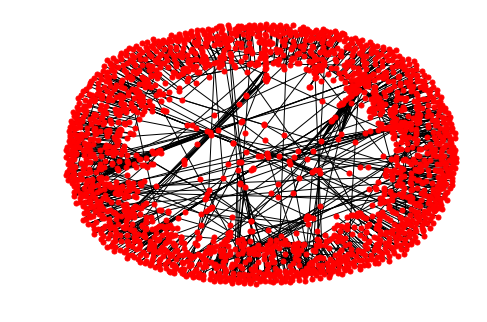

In [16]:
g = nx.DiGraph()

# open csv edgelist and read edges into graph
for index, row in edges.iterrows():
    g.add_edge(row['source'], row['target'], weight = row['weight'])

pos = nx.spring_layout(g)

# draw network without node color
nx.draw(g, pos, with_labels=False, node_size=25, arrows = False)

In [17]:
texts = list(cos_links.text1.values) + list(cos_links.text2.values)
rubrics = list(cos_links.rubric_text1.values) + list(cos_links.rubric_text2)
texts_rubrics = list(zip(texts, rubrics))
texts_rubrics = list(set(texts_rubrics))

In [18]:
texts, rubrics = zip(*texts_rubrics)

In [19]:
nodes = pd.DataFrame({'node' : texts,
                      'rubric' : rubrics})

In [26]:
set(articles_good_rubrics.final_rubrics)

{'Computer Science',
 'Биология',
 'История',
 'Космос',
 'Культура',
 'Математика',
 'Науки о земле',
 'Политология',
 'Психология',
 'Социология',
 'Технологии',
 'Физика',
 'Физиология человека',
 'Философия',
 'Футурология',
 'Химия',
 'Экономика',
 'Язык'}

In [15]:
rubric_colors = {
    'Computer Science':'blue',
    'Биология':'red',
    'История':'green',
    'Космос':'yellow',
    'Культура':'orange',
    'Математика':'grey',
    'Науки о земле':'pink',
    'Политология':'brown',
    'Психология':'black',
    'Социология':'magenta',
    'Технологии':'cyan',
    'Физиология человека':'darkblue',
    'Химия':'darkgreen',
    'Физика':'crimson',
    'Философия':'darkorange',
    'Футурология':'greenyellow',
    'Экономика':'lightpink',
    'Язык':'violet'
}

In [21]:
rubric_attribute = []
for index, row in nodes.iterrows():
    rubric_attribute.append((row['node'], row['rubric']))
    
rubric_dictionary = dict(rubric_attribute)

nx.set_node_attributes(g, rubric_dictionary, "rubric")

In [16]:
node_col = []

for node in g.nodes(data=True):
    rubr_attr = node[1]['rubric']
    node_col.append(rubric_colors[rubr_attr])
    #print(node[1]['rubric'])

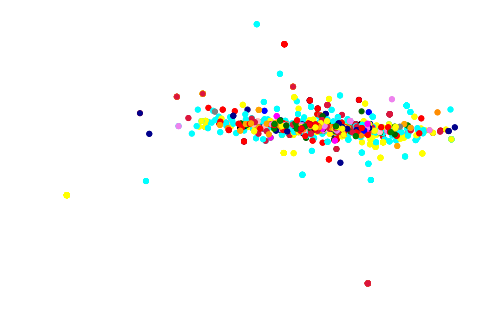

In [23]:
nx.draw_spectral(g, with_labels=False, node_size=25, node_color=node_col, arrows = False)

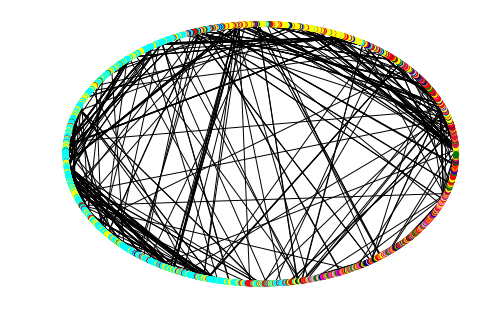

In [24]:
nx.draw_circular(g, with_labels=False, node_size=25, node_color=node_col, arrows = False)

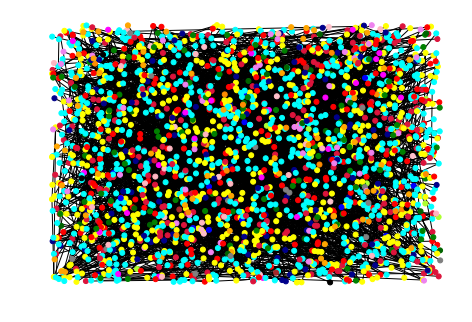

In [25]:
nx.draw_random(g, with_labels=False, node_size=25, node_color=node_col, arrows = False)

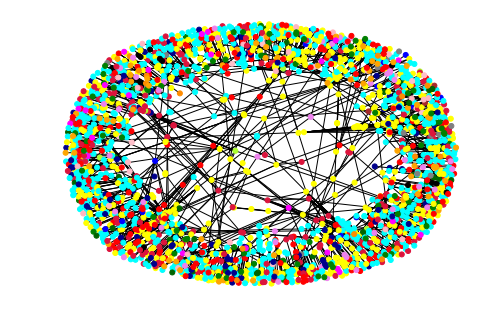

In [26]:
nx.draw_spring(g, with_labels=False, node_size=25, node_color=node_col, arrows = False)

## Graph Characteristics

In [27]:
g.number_of_nodes()

2243

In [28]:
g.number_of_edges()

2245

In [29]:
#nodes sorted by degree
sorted(nx.degree(g), key = lambda x: x[1], reverse = True)

[(12451.0, 20),
 (72.0, 19),
 (12395.0, 18),
 (4025.0, 17),
 (24234.0, 17),
 (12041.0, 17),
 (19480.0, 16),
 (3726.0, 16),
 (15279.0, 15),
 (7724.0, 15),
 (10618.0, 14),
 (15167.0, 14),
 (10376.0, 14),
 (13296.0, 14),
 (12474.0, 14),
 (24080.0, 13),
 (10601.0, 13),
 (174.0, 12),
 (7862.0, 12),
 (10464.0, 12),
 (10195.0, 12),
 (10119.0, 12),
 (12689.0, 12),
 (12951.0, 12),
 (23124.0, 11),
 (5587.0, 11),
 (18147.0, 11),
 (4723.0, 11),
 (13400.0, 11),
 (12488.0, 11),
 (7452.0, 11),
 (10075.0, 11),
 (10109.0, 11),
 (10962.0, 11),
 (12003.0, 11),
 (12686.0, 11),
 (5697.0, 10),
 (16703.0, 10),
 (5509.0, 10),
 (12537.0, 10),
 (10219.0, 10),
 (10710.0, 10),
 (4741.0, 9),
 (18358.0, 9),
 (11951.0, 9),
 (9605.0, 9),
 (9620.0, 9),
 (9627.0, 9),
 (9628.0, 9),
 (9642.0, 9),
 (12531.0, 9),
 (12734.0, 9),
 (480.0, 8),
 (8518.0, 8),
 (15083.0, 8),
 (15113.0, 8),
 (412.0, 8),
 (428.0, 8),
 (23631.0, 8),
 (12503.0, 8),
 (6046.0, 8),
 (6813.0, 8),
 (6886.0, 8),
 (6940.0, 8),
 (9532.0, 8),
 (9533.0, 8),
 

### Highest degree nodes

In [88]:
#highest degree text
print(articles_good_rubrics.iloc[12451])

path                 nplus1.ru/nplus1_news/nplus1.ru-news-2017-03-2...
source                                                       nplus1.ru
url                         nplus1.ru/news/2017/03/29/falcon-is-coming
date                                                        2017-03-29
title                Первый повторный полет Falcon 9 назначен на 30...
subtitle                                                           NaN
author                                                Николай Воронцов
tags                                                          _Космос_
genre                                                          Новости
mapped_rubrics                                                  Космос
final_rubrics                                                   Космос
number_of_rubrics                                                  One
text                 посадка один ступень falcon миссия ces spacex ...
Name: 12451, dtype: object


In [93]:
for ngh in nx.all_neighbors(g, 12451):
    print(articles_good_rubrics.iloc[int(ngh)].url)
    print(articles_good_rubrics.iloc[int(ngh)].title)
    
    print(articles_good_rubrics.iloc[int(ngh)].text[:200])
    print('\n')

nplus1.ru/news/2016/05/06/second-time
SpaceX во второй раз посадила первую ступень Falcon 9 на баржу
spacex аэрокосмический компания spacex успешный доставка груз орбита посадить один ступень ракета falcon плавучий платформа запуск посадка наблюдать прямой эфир два успешный посадка один ступень falco


nplus1.ru/news/2016/05/10/second-landing
SpaceX показала посадку Falcon 9 под разными углами
spacex аэрокосмический компания spacex опубликовать видео успешный посадка один ступень ракета falcon плавучий платформа ролик показывать посадка один ступень три разный точка доступный просмотр youtu


nplus1.ru/news/2016/06/08/this-fall-rocket-shall-not-fall
SpaceX запланировала повторный запуск первой ступени Falcon 9 на осень
четыре успешно сесть один ступень falcon spacex flickr аэрокосмический компания spacex запланировать повторный запуск использоваться один ступень falcon осень сообщить свой твиттер илона маск глава sp


nplus1.ru/news/2016/08/31/ses-launch
SpaceX нашла груз для первого п

In [94]:
for ngh in nx.all_neighbors(g, 72):
    print(articles_good_rubrics.iloc[int(ngh)].url)
    print(articles_good_rubrics.iloc[int(ngh)].title)
    
    print(articles_good_rubrics.iloc[int(ngh)].text[:200])
    print('\n')

https://chrdk.ru/sci/cp-symmetry_violation
Несимметричные нейтрино
учёный удаться обнаружить намёк нарушение сравнить симметрия эксперимент нейтрино возможно результат позволить объяснить вселенная вещество антивещество чердак рассказать завотдел физика высокий энерг


https://chrdk.ru/sci/kak_otkrytie_massy_neitrino_mozhet_obyasnit_sushhestvovanie_vselennoi
Антивещество, темная материя и новая физика
физика получить два престижный премия открытие масса нейтрино один нобелёвка открытие помочь объяснить вселенная материя антиматерия чердак рассказать завотдел физика высокий энергия институт ядерный 


https://chrdk.ru/sci/nobelevku_po_fizike_prisudili_za_dokazatelstvo_ostsiliatsij_neitrino
Свергнуть старую физику
нобелевский премия физиология медицина присудить сугубо практический исследование спасти жизнь сотня человек противовес физический нобель достаться учёный заниматься сверхфундаментальный вещь пытаться


https://chrdk.ru/news/arkticheskiy_detektor_poka_ne_obnaruzhil_sterilnoe_ne

In [55]:
#from networkx.drawing.nx_agraph import graphviz_layout

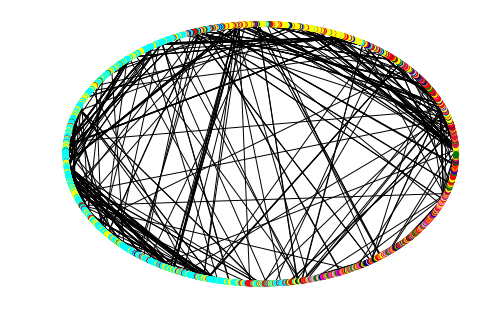

In [58]:
pos = nx.shell_layout(g)

nx.draw(g, pos, with_labels=False, node_size=25, node_color=node_col, arrows = False)

## Save graph

In [59]:
nx.write_gexf(g, 'cos_graph.gexf')

In [69]:
nx.write_gml(g,'cos_graph_gml')

In [13]:
g = nx.read_gexf('cos_graph.gexf')

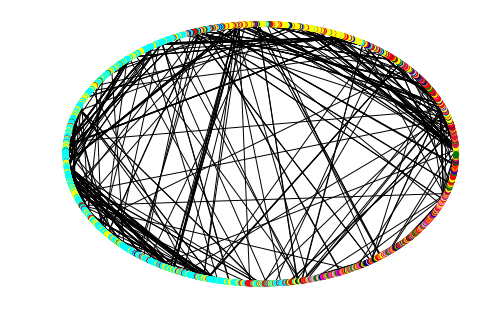

In [19]:
pos = nx.shell_layout(g)

nx.draw(g, pos, with_labels=False, node_size=25, node_color=node_col, arrows = False)

## Graph for Rubrics Similarity

In [20]:
cosine_matr.shape

(24611, 24611)

In [21]:
cos_matr_triu = np.triu(cosine_matr, k=0)

In [22]:
print(cosine_matr[10][0])
print(cosine_matr[0][10])
print(cos_matr_triu[10][0])
print(cos_matr_triu[0][10])

0.05297721083794853
0.05297721083794853
0.0
0.05297721083794853


* При пороговом значении для близости cos_sim = 0.5:

In [23]:
cos_measures_triu = []
i, j = np.where((cos_matr_triu > 0.5)&(cos_matr_triu < 0.999))
for i_num, j_num in zip(i,j):
 #   if i_num > j_num:
    cos_measures_triu.append(cos_matr_triu[i_num][j_num])
print(len(i))

24387


In [107]:
i, j = np.where((cosine_matr > 0.5005)&(cosine_matr < 0.501))

In [108]:
print(list(zip(i,j)))

[(216, 10953), (250, 2922), (368, 21770), (390, 4976), (424, 6374), (428, 16063), (428, 20801), (464, 24458), (685, 23351), (816, 23651), (1168, 3766), (1380, 3915), (1380, 24393), (1427, 7242), (1467, 18578), (1529, 1906), (1906, 1529), (1923, 15915), (2397, 4911), (2490, 18365), (2496, 12235), (2689, 19522), (2730, 3704), (2730, 4796), (2746, 12492), (2898, 19297), (2922, 250), (3075, 3321), (3101, 5634), (3316, 4420), (3321, 3075), (3495, 9600), (3516, 5578), (3570, 3704), (3619, 5625), (3704, 2730), (3704, 3570), (3744, 4657), (3766, 1168), (3848, 12200), (3910, 5020), (3915, 1380), (4034, 4121), (4034, 12734), (4047, 10188), (4103, 7734), (4121, 4034), (4124, 10962), (4420, 3316), (4449, 12488), (4458, 5114), (4569, 22585), (4593, 13735), (4619, 20901), (4650, 5409), (4657, 3744), (4792, 20465), (4796, 2730), (4911, 2397), (4976, 390), (5008, 5334), (5017, 5122), (5020, 3910), (5085, 5624), (5114, 4458), (5122, 5017), (5191, 8445), (5296, 22321), (5334, 5008), (5409, 4650), (5413,

In [113]:
print(articles_good_rubrics.iloc[216].text[:200])
print('\n')
print(articles_good_rubrics.iloc[10953].text[:200])

мировой новость прокатиться сенсация возможно российский телескоп ратан поймать искусственный радиосигнал звезда hd учёный заявление контакт внеземной цивилизация делать наблюдать ратан превратиться с


bill lile flickr upd российский астроном назвать необычный сигнал солнцеподобный звезда земнымроссийский телескоп ратан уловить необычный радиосигнал исходящий область неподалёку звезда hd созвездие г


In [34]:
print(articles_good_rubrics.iloc[12235].text[:200])
print('\n')
print(articles_good_rubrics.iloc[2496].text[:200])

spacex nasa поддержать намерение американский компания spacex отправить космический турист полёт луна обратно согласно заявление агентство выступать отправка американский исследователь космос вновь пр


московский компания space exploration technologies известный spacex осуществить успешный запуск ракета носитель falcon космодром база ввс сша мыс канаверал флорида вывести космос грузовой космический 


In [33]:
print(articles_good_rubrics.iloc[464].text[:300])
print('\n')
print(articles_good_rubrics.iloc[24458].text[:300])

американский биолог продемонстрировать применение антибиотик пчела резко сокращать количество полезный бактерия кишечник ухудшать иммунитет повышать смертность сокращение количество пчела мир признаваться проблема глобальный уровень удивительно пчела опылять сельскохозяйственный растение сша пчела п


современный медоносный пчела страдать многочисленный угроза самый серьёзный распространение паразитический клещ варроа деструктор varroa des ruc or латинский название означать разрушитель получить гибельный действие пчелиный семья клещ варроа размножаться пчелиный улей плоский тело размер миллиметр 


### Full cos similarity df

In [54]:
cos_measures_triu = []
i, j = np.where((cos_matr_triu > 0.5)&(cos_matr_triu < 0.999))
for i_num, j_num in zip(i,j):
 #   if i_num > j_num:
    cos_measures_triu.append(cos_matr_triu[i_num][j_num])
print(len(i))

24387


In [55]:
print(len(i))
print(len(j))
print(len(cos_measures_triu))

24387
24387
24387


In [24]:
cos_05_df = pd.DataFrame({'text1':i, 'text2':j, 'similarity':cos_measures_triu})
cos_05_df = cos_05_df[['text1', 'text2', 'similarity']]

In [25]:
cos_05_df[cos_05_df.similarity < 0.7].head()

,text1,text2,similarity
1,2,913,0.561699
2,2,5074,0.663363
3,2,12999,0.592937
4,2,14760,0.526159
5,2,16037,0.669185


In [26]:
rubric_map = dict(zip(articles_good_rubrics.index, articles_good_rubrics.final_rubrics))

In [27]:
cos_05_df = cos_05_df.assign(rubric_text1 = pd.Series([rubric_map[text1_ind] for text1_ind in cos_05_df.text1]).values)
cos_05_df = cos_05_df.assign(rubric_text2 = pd.Series([rubric_map[text2_ind] for text2_ind in cos_05_df.text2]).values)

In [28]:
cos_05_df.head()

,text1,text2,similarity,rubric_text1,rubric_text2
0,2,809,0.723853,Физиология человека,Биология
1,2,913,0.561699,Физиология человека,Биология
2,2,5074,0.663363,Физиология человека,Биология
3,2,12999,0.592937,Физиология человека,Физиология человека
4,2,14760,0.526159,Физиология человека,Биология


In [29]:
cos_05_df.to_csv('cos_05_similarity.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [63]:
cos_05_df[cos_05_df.rubric_text1 != cos_05_df.rubric_text2].shape

(4972, 5)

In [30]:
cos_05_df.groupby(['rubric_text1', 'rubric_text2']).size().sort_values(ascending = False)

rubric_text1         rubric_text2       
Космос               Космос                 9976
Технологии           Технологии             3523
Физика               Физика                 2187
Биология             Биология               1689
Космос               Физика                  697
Язык                 Язык                    587
Физика               Космос                  484
Физиология человека  Физиология человека     448
Биология             Физиология человека     388
История              История                 384
Физиология человека  Биология                362
Технологии           Космос                  265
                     Физика                  162
Футурология          Космос                  156
Физика               Технологии              143
Культура             Культура                133
Космос               Технологии              121
Социология           Социология              103
Технологии           Биология                 92
Науки о земле        Науки о

In [32]:
rubric_combinations_df = cos_05_df.groupby(['rubric_text1', 'rubric_text2']).size().to_frame(name = 'count').reset_index()

In [33]:
rubric_combinations_df.head(20)

,rubric_text1,rubric_text2,count
0,Computer Science,Computer Science,52
1,Computer Science,Биология,10
2,Computer Science,История,2
3,Computer Science,Математика,9
4,Computer Science,Науки о земле,3
5,Computer Science,Технологии,42
6,Computer Science,Физика,39
7,Computer Science,Физиология человека,12
8,Computer Science,Химия,4
9,Computer Science,Экономика,3


In [34]:
rubric_combinations_df.to_csv('rubrics_couples.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [74]:
rubric_volume = dict(articles_good_rubrics.groupby(['final_rubrics']).size())
rubric_volume

{'Computer Science': 421,
 'Биология': 4049,
 'История': 2257,
 'Космос': 4323,
 'Культура': 699,
 'Математика': 249,
 'Науки о земле': 575,
 'Политология': 55,
 'Психология': 380,
 'Социология': 464,
 'Технологии': 5773,
 'Физика': 1969,
 'Физиология человека': 1802,
 'Философия': 142,
 'Футурология': 188,
 'Химия': 506,
 'Экономика': 232,
 'Язык': 527}

In [55]:
cos_05_aggr = cos_05_df.groupby(['rubric_text1', 'rubric_text2'], as_index = False).agg({'similarity': ['count','sum']})

In [56]:
cos_05_aggr.reset_index(inplace = True)

In [54]:
cos_05_aggr

In [64]:
#dictionary - rubric_couple:count
def make_rubric_dict(rubr_df):
    rubric_couples_dict = {}
    for index, row in rubr_df.iterrows():
        rubr_couple = ('|').join(sorted((row['rubric_text1'], row['rubric_text2'])))
        rubric_couples_dict.setdefault(rubr_couple, 0)
        rubric_couples_dict[rubr_couple] += row['count']
    return rubric_couples_dict
        

In [68]:
rubric_couples_dict = make_rubric_dict(rubric_combinations_df)

In [70]:
len(rubric_couples_dict)

144

In [84]:
rubric_couples_df = pd.DataFrame(list(rubric_couples_dict.items()), columns = ['couple', 'count'])

In [ ]:
df = pd.DataFrame(df.row.str.split(' ',1).tolist(),
                                   columns = ['flips','row'])

In [85]:
rubric_couples_df['rubric_text1'], rubric_couples_df['rubric_text2'] = rubric_couples_df['couple'].str.split('|',1).str
rubric_couples_df.pop('couple')

In [90]:
rubr_count_df = articles_good_rubrics.groupby(['final_rubrics']).size().to_frame(name = 'rubr_count').reset_index()

In [91]:
rubr_count_df

,final_rubrics,rubr_count
0,Computer Science,421
1,Биология,4049
2,История,2257
3,Космос,4323
4,Культура,699
5,Математика,249
6,Науки о земле,575
7,Политология,55
8,Психология,380
9,Социология,464


In [92]:
rubr_count_dict = articles_good_rubrics.groupby(['final_rubrics']).size().to_dict()

In [94]:
rubr_count_dict

{'Computer Science': 421,
 'Биология': 4049,
 'История': 2257,
 'Космос': 4323,
 'Культура': 699,
 'Математика': 249,
 'Науки о земле': 575,
 'Политология': 55,
 'Психология': 380,
 'Социология': 464,
 'Технологии': 5773,
 'Физика': 1969,
 'Физиология человека': 1802,
 'Философия': 142,
 'Футурология': 188,
 'Химия': 506,
 'Экономика': 232,
 'Язык': 527}

In [96]:
rubric_similarity = []
for index, row in rubric_couples_df.iterrows():
    rubr_sim = row['count']*10000/(rubr_count_dict[row['rubric_text1']]*rubr_count_dict[row['rubric_text2']])
    rubric_similarity.append(rubr_sim)

In [97]:
rubric_similarity[:5]

[2.933858418763153,
 0.10559482444567117,
 0.021048266833088296,
 0.8585410525713304,
 0.16523804606010534]

In [98]:
rubric_couples_df['rubrics_similarity'] = rubric_similarity

In [101]:
rubric_couples_df

,count,rubric_text1,rubric_text2,rubrics_similarity
0,52,Computer Science,Computer Science,2.933858
1,18,Computer Science,Биология,0.105595
2,2,Computer Science,История,0.021048
3,9,Computer Science,Математика,0.858541
4,4,Computer Science,Науки о земле,0.165238
5,112,Computer Science,Технологии,0.460823
6,63,Computer Science,Физика,0.759999
7,16,Computer Science,Физиология человека,0.210903
8,7,Computer Science,Химия,0.328598
9,3,Computer Science,Экономика,0.307150
